# Serie Image processing: post 4, Transformations

https://scikit-image.org/docs/0.14.x/api/skimage.transform.html

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure, transform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Rotation

/opt/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


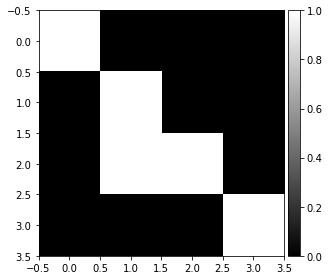

In [2]:
image_test = np.array([[1,0,0,0], [0,1,0,0], [0,1,1,0], [0,0,0,1]])
imshow(image_test, cmap=plt.get_cmap('gray'))

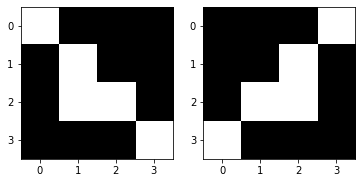

In [38]:
rotated = transform.rotate(image_test, angle=90, preserve_range=True)
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(rotated, cmap=plt.get_cmap('gray'))

In [40]:
rotated.astype('int32')

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 0]], dtype=int32)

## Resizing

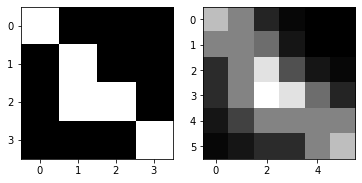

In [60]:
resized_img = transform.resize(image=image_test, output_shape=(6,6), preserve_range=True)
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(resized_img, cmap=plt.get_cmap('gray'))

In [46]:
resized_img

array([[0.72222222, 0.5       , 0.13888889, 0.02777778, 0.        ,
        0.        ],
       [0.5       , 0.5       , 0.41666667, 0.08333333, 0.        ,
        0.        ],
       [0.16666667, 0.5       , 0.86111111, 0.30555556, 0.08333333,
        0.02777778],
       [0.16666667, 0.5       , 0.97222222, 0.86111111, 0.41666667,
        0.13888889],
       [0.08333333, 0.25      , 0.5       , 0.5       , 0.5       ,
        0.5       ],
       [0.02777778, 0.08333333, 0.16666667, 0.16666667, 0.5       ,
        0.72222222]])

In [50]:
resized_img.shape

(6, 6)

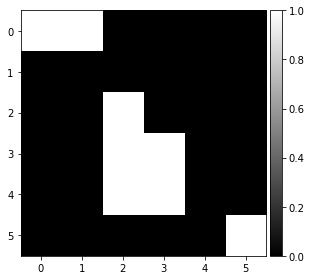

In [59]:
intresized = resized_img > 0.5
imshow(intresized.astype('int32'), cmap=plt.get_cmap('gray'))

## Rescaling

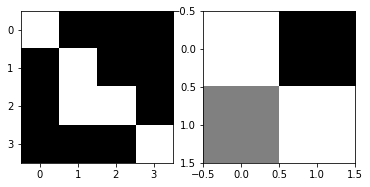

In [61]:
image_rescaled = transform.rescale(image=image_test, scale=1.0 / 2.0, anti_aliasing=False, preserve_range=True)
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(image_rescaled, cmap=plt.get_cmap('gray'))

In [43]:
image_rescaled.shape

(2, 2)

In [44]:
image_rescaled

array([[1.08420217e-19, 5.42101086e-20],
       [8.13151629e-20, 1.08420217e-19]])

## Downscaling

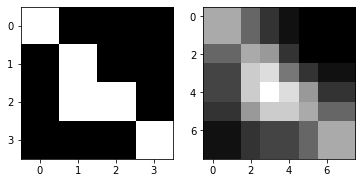

In [7]:
image_rescaled = transform.rescale(image_test, 2.0, anti_aliasing=False)
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(image_rescaled, cmap=plt.get_cmap('gray'))

## Similarity on a real image

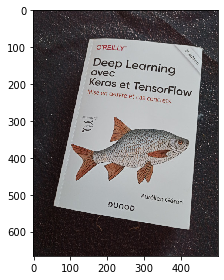

In [8]:
image = imread('book.jpg')
imshow(image)

In [27]:
tr = transform.SimilarityTransform(scale=1.5, rotation=math.pi/20, translation=(-40, -250))
print (tr)

<SimilarityTransform(matrix=
    [[ 1.48153251e+00, -2.34651698e-01, -4.00000000e+01],
     [ 2.34651698e-01,  1.48153251e+00, -2.50000000e+02],
     [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])>


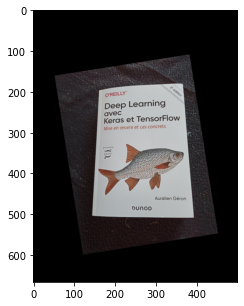

In [64]:
plt.figure(figsize=(8, 5))
image_tr_1 = transform.warp(image, tr)
plt.imshow(image_tr_1)

# Morphological transformations

In [125]:
from skimage import morphology
from skimage import data

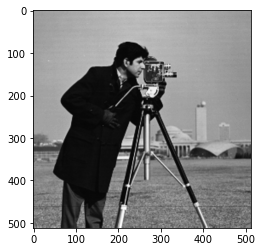

In [131]:
image_test = data.camera()
plt.imshow(image_test, cmap=plt.get_cmap('gray'))

In [132]:
morphology.diamond(4, dtype=np.uint16)

array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint16)

In [133]:
for i in range(1):
    image_test = morphology.binary_dilation(image_test)

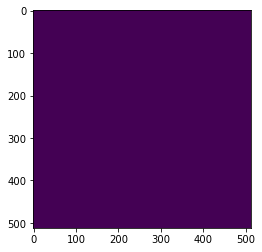

In [134]:
plt.imshow(image_test)